In [67]:
import numpy as np
import scipy.constants as sc
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
from scipy.optimize import curve_fit

In [21]:
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['mathtext.fontset'] = 'dejavuserif' 
rcParams['figure.figsize'] = (10, 7)
rcParams['figure.dpi'] = 100
rcParams['axes.grid'] = True
rcParams['font.size'] = 14

In [13]:
calib_data = pd.read_csv("calibration.csv")
h_data = pd.read_csv("hydrogen.csv")
i_data = pd.read_csv("iodine.csv")

calib_data.sort_values("angle", inplace=True)
calib_data.reset_index(inplace=True)
calib_data.drop("index", axis=1, inplace=True)

           4             3             2
1.036e-10 x - 3.938e-07 x + 0.0007589 x - 0.008151 x + 3986
           3             2
4.142e-10 x - 1.181e-06 x + 0.001518 x - 0.008151
14.372973675301141


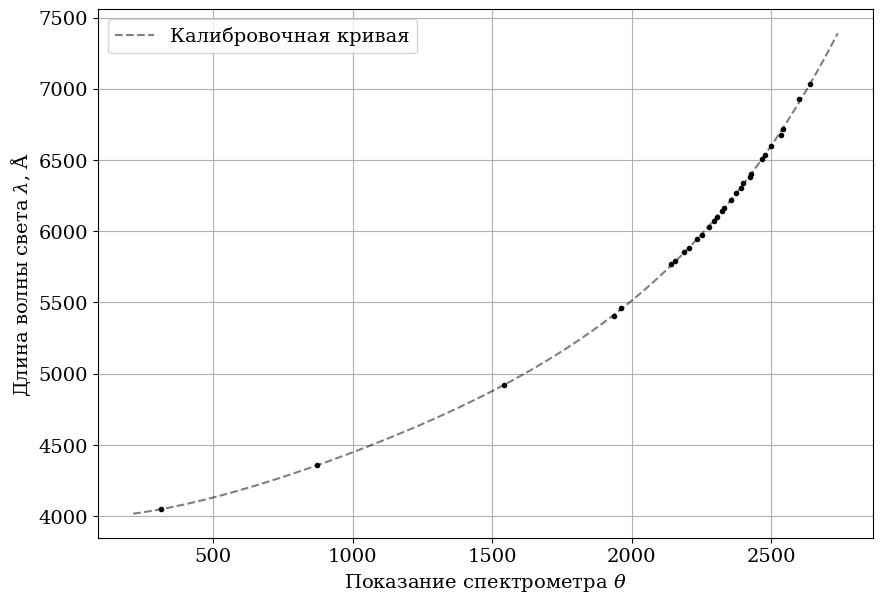

In [49]:
x = calib_data["angle"]
y = calib_data["length"]
x_l = np.linspace(min(x) - 100, max(x) + 100, 100)

args = np.polyfit(x, y, 4)
calib_f = np.poly1d(args)
print(calib_f)
print(calib_f.deriv(1))
print(calib_f.deriv(1)(2500) * 5)

plt.scatter(x, y, marker='.', zorder=3, color="black")
plt.plot(x_l, calib_f(x_l), label="Калибровочная кривая", color="black", ls="--", alpha=0.5)


plt.legend()
plt.ylabel(r"Длина волны света $\lambda$, Å")
plt.xlabel(r"Показание спектрометра $\theta$")
plt.savefig("calibration.pdf")

In [77]:
h_data["length"] = calib_f(h_data["angle"])
h_data["error"] = calib_f.deriv(1)(h_data["angle"]) * 5
h_data["rerror"] = h_data["error"] / h_data["length"]
h_data["frequency"] = sc.c / h_data["length"] * 1e10
h_data

,H,angle,length,error,frequency,rerror
0,1,2486,6560.850614,14.138439,4.569414e+14,0.002155
1,2,1490,4866.612703,5.003186,6.160187e+14,0.001028
2,3,846,4337.116287,3.405463,6.912253e+14,0.000785
3,4,428,4094.407714,2.287445,7.321998e+14,0.000559


10.977624937955353 0.00685390309215254


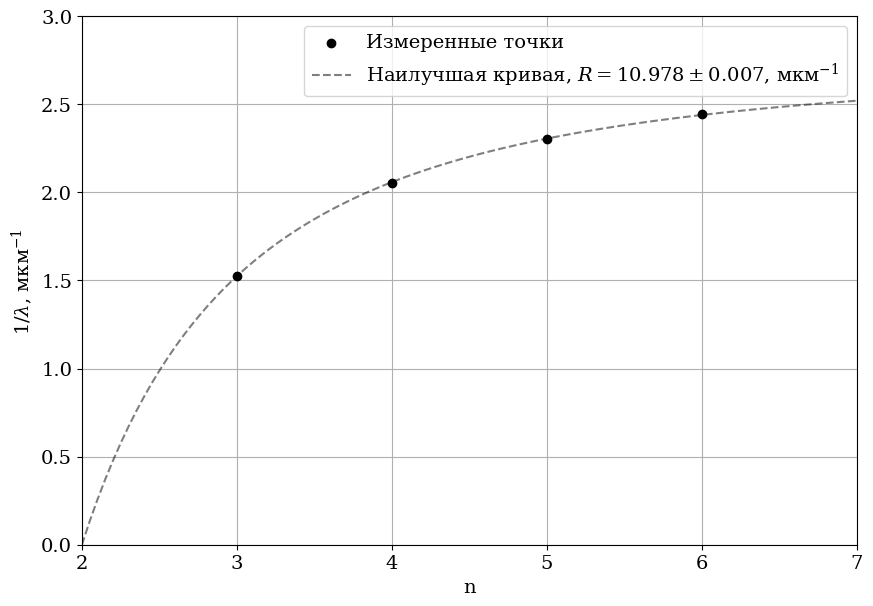

In [107]:
def balmer(n, R):
    return R * (1/4 - 1/n**2)

x = np.array([3, 4, 5, 6])
y = 1e4 / h_data["length"]
x_l = np.linspace(2, 7, 100)
arg, cov = curve_fit(balmer, x, y)
R, R_err = arg[0], np.sqrt(cov)[0, 0]
print(R, R_err)

plt.scatter(x, y, color="black", label="Измеренные точки", zorder=3)
# plt.errorbar(x, y, y * h_data["rerror"], 0, 'none', capsize=3, color="black", label="Измеренные точки")
plt.plot(x_l, balmer(x_l, arg[0]), ls='--', color='black', alpha=0.5, label=f"Наилучшая кривая, $R={R:.3f}\pm{R_err:.3f}$, мкм$^{{-1}}$")

plt.ylabel("$1/\lambda$, мкм$^{-1}$")
plt.xlabel("n")
plt.xlim(2, 7)
plt.ylim(0, 3)
plt.legend()

plt.savefig("ridberg.pdf")

In [101]:
i_data["length"] = calib_f(i_data["angle"])
i_data["error"] = calib_f.deriv(1)(i_data["angle"]) * 5
i_data["rerror"] = i_data["error"] / i_data["length"]
i_data["energy"] = sc.h * sc.c / i_data["length"] * 1e10 / sc.electron_volt
i_data["energy_error"] = i_data["energy"] * i_data["rerror"]
i_data

,I,angle,length,error,rerror,energy,energy_error
0,0,2368,6249.298254,12.306877,0.001969,1.983970,0.003907
1,5,2280,6043.496343,11.101730,0.001837,2.051531,0.003769
2,-1,1778,5192.197233,6.419213,0.001236,2.387895,0.002952
